# Moore's Law

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

data = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv')

In [11]:
data.head()

,1971,2300
0,1972,3500
1,1973,2500
2,1973,2500
3,1974,4100
4,1974,4500


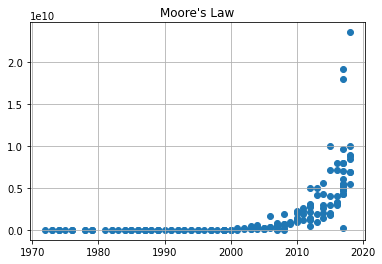

In [12]:
X = data.iloc[:,0].values.reshape(-1,1)
Y = data.iloc[:,1].values.reshape(-1,1)

plt.scatter(X,Y)
plt.title('Moore\'s Law')
plt.grid()


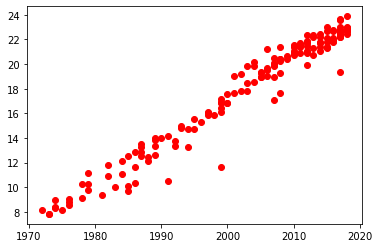

In [13]:
Y = np.log(Y)

plt.scatter(X,Y, color='red')


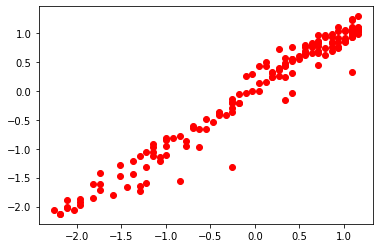

In [15]:
mean_x = X.mean()
mean_y = Y.mean()
std_x = X.std()
std_y = Y.std()

X = (X-mean_x)/std_x
Y = (Y-mean_y)/std_y

plt.scatter(X,Y,color='red')

In [16]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [17]:
model = nn.Linear(1,1)

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.7)

inputs = torch.from_numpy(X)

targets = torch.from_numpy(Y)

In [18]:
# Train the model
n_epochs = 100
losses = []

for it in range(n_epochs):

  optimizer.zero_grad()

  outputs = model(inputs)
  loss = criterion(outputs, targets)

  losses.append(loss.item())
    
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 1.2283
Epoch 2/100, Loss: 1.1812
Epoch 3/100, Loss: 1.1043
Epoch 4/100, Loss: 1.0109
Epoch 5/100, Loss: 0.9109
Epoch 6/100, Loss: 0.8110
Epoch 7/100, Loss: 0.7154
Epoch 8/100, Loss: 0.6269
Epoch 9/100, Loss: 0.5465
Epoch 10/100, Loss: 0.4747
Epoch 11/100, Loss: 0.4115
Epoch 12/100, Loss: 0.3563
Epoch 13/100, Loss: 0.3085
Epoch 14/100, Loss: 0.2674
Epoch 15/100, Loss: 0.2321
Epoch 16/100, Loss: 0.2020
Epoch 17/100, Loss: 0.1765
Epoch 18/100, Loss: 0.1548
Epoch 19/100, Loss: 0.1364
Epoch 20/100, Loss: 0.1210
Epoch 21/100, Loss: 0.1079
Epoch 22/100, Loss: 0.0969
Epoch 23/100, Loss: 0.0876
Epoch 24/100, Loss: 0.0799
Epoch 25/100, Loss: 0.0733
Epoch 26/100, Loss: 0.0678
Epoch 27/100, Loss: 0.0632
Epoch 28/100, Loss: 0.0594
Epoch 29/100, Loss: 0.0561
Epoch 30/100, Loss: 0.0534
Epoch 31/100, Loss: 0.0512
Epoch 32/100, Loss: 0.0493
Epoch 33/100, Loss: 0.0477
Epoch 34/100, Loss: 0.0463
Epoch 35/100, Loss: 0.0452
Epoch 36/100, Loss: 0.0443
Epoch 37/100, Loss: 0.0435
Epoch 38/1

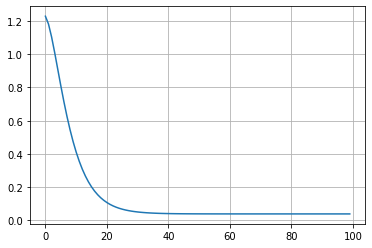

In [20]:
plt.plot(losses)
plt.grid()

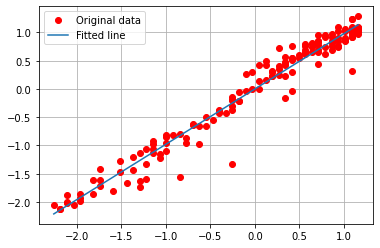

In [22]:
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.grid()
plt.show()